# 外部サービスの提供するAPIを利用する
## `API`とは
[アプリケーションプログラミングインターフェイス - Wikipedia]( https://ja.wikipedia.org/wiki/%E3%82%A2%E3%83%97%E3%83%AA%E3%82%B1%E3%83%BC%E3%82%B7%E3%83%A7%E3%83%B3%E3%83%97%E3%83%AD%E3%82%B0%E3%83%A9%E3%83%9F%E3%83%B3%E3%82%B0%E3%82%A4%E3%83%B3%E3%82%BF%E3%83%95%E3%82%A7%E3%83%BC%E3%82%B9)
### つまり何
サービス・アプリケーションの**機能を**そのサービス・アプリケーション**外から扱えるようにする**もの
* Twitterの非公式クライアント
* [Yahoo 形態素解析API](https://developer.yahoo.co.jp/webapi/jlp/ma/v1/parse.html)
* [Livedoor お天気Webサービス](http://weather.livedoor.com/weather_hacks/webservice)

のようなものがサービスのAPIの一例  

他にもPythonで画面描画するために使う`GTK`, `Qt`のようなものを扱うための*Pythonバインディング*もAPIと言える


## スクレイピングとの違い
### スクレイピングを利用したプログラミング
もともと**プログラムで扱うことを想定していない**ものをプログラムで解析する  
無駄な処理もあり、比較的遅いが、Webページとして公開されているものであれば**どんなものでも解析可能**  
例) Twitter for Web
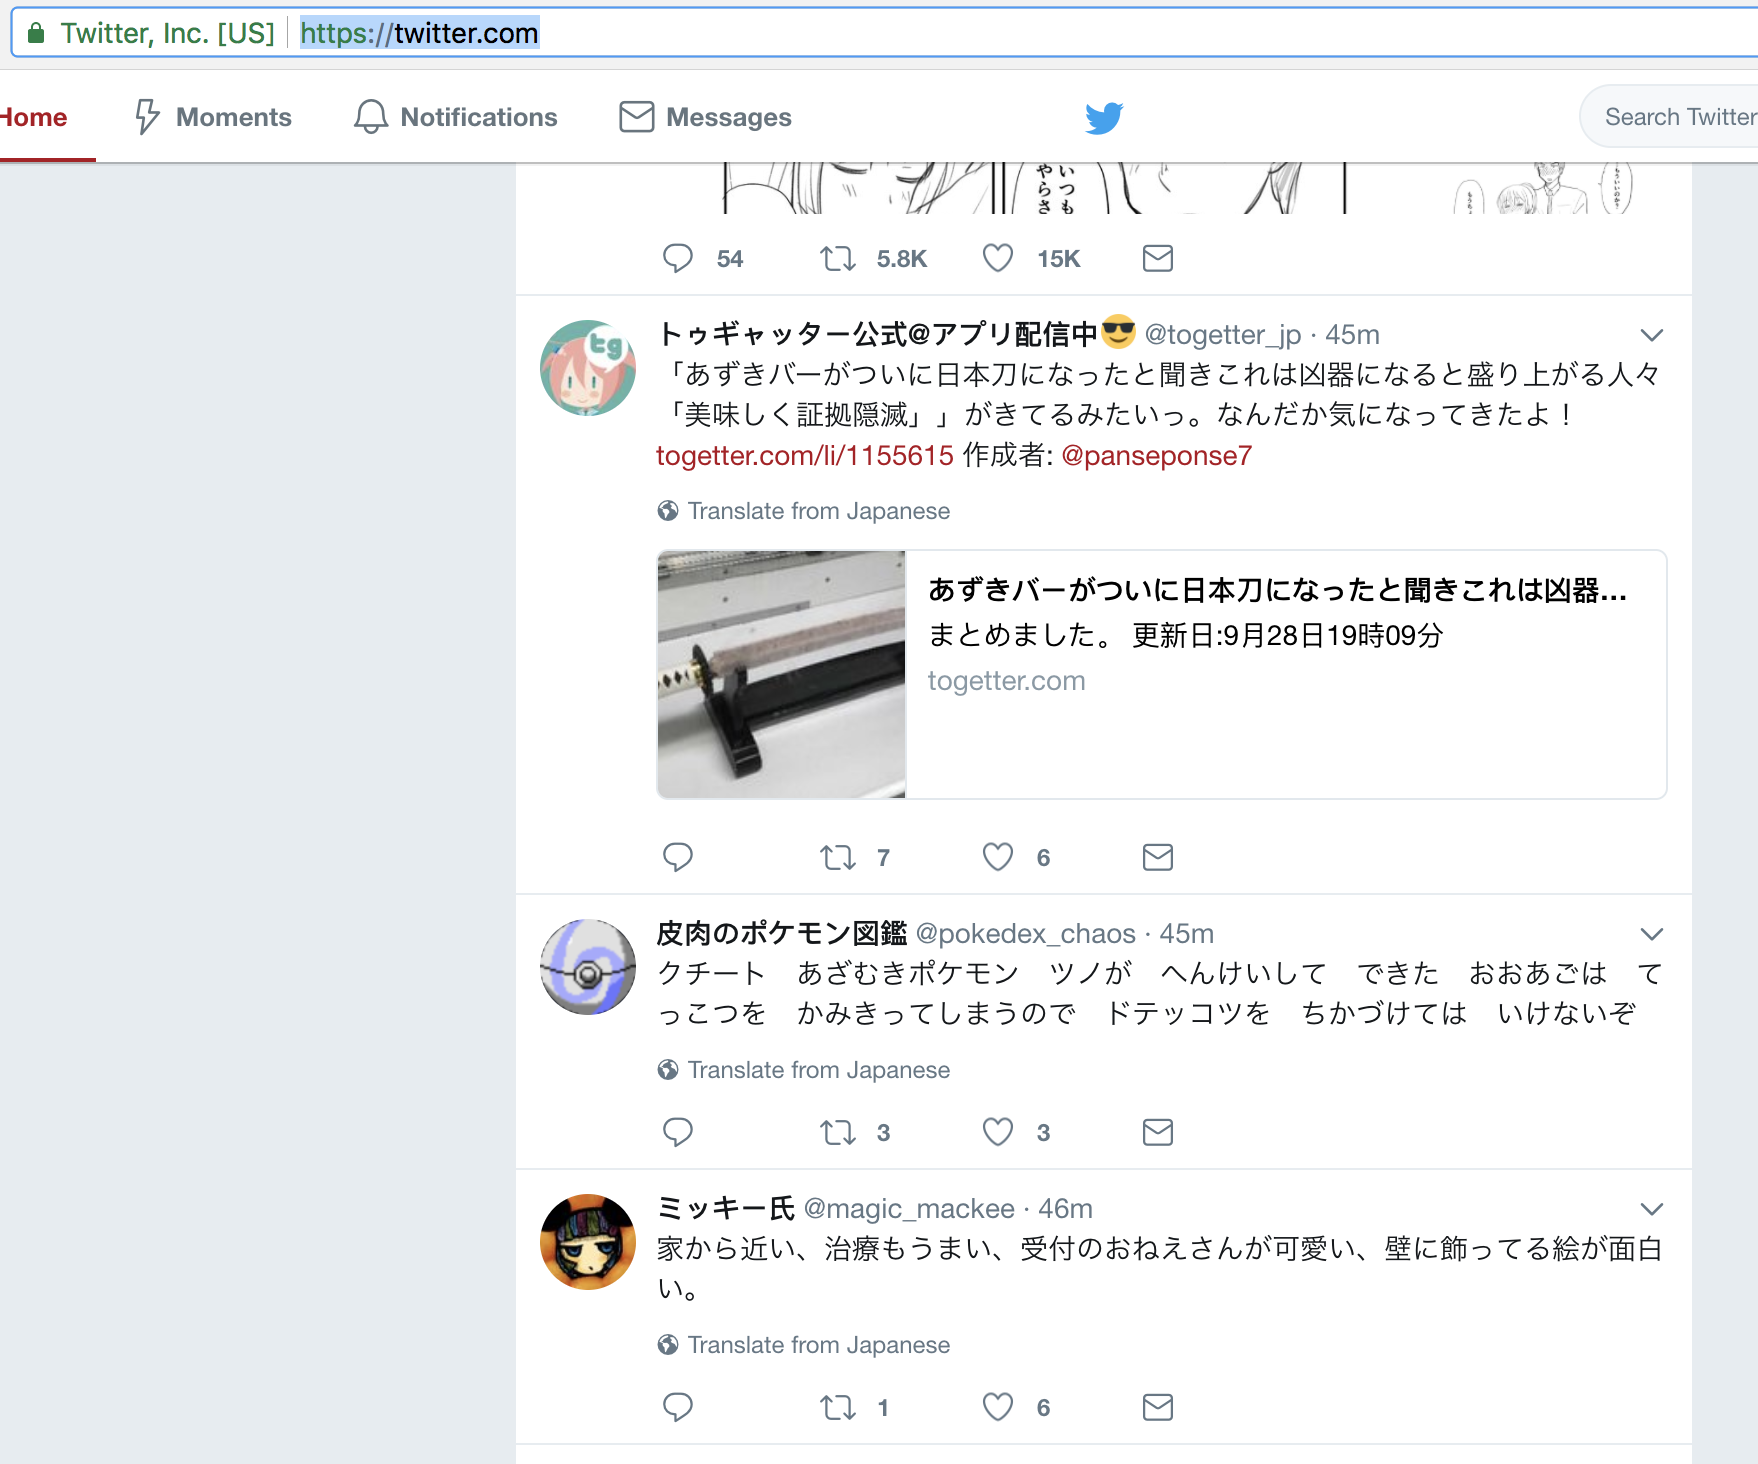

### APIを利用したプログラミング
**プログラムで扱うことを前提**として送られてくるデータをプログラムで解析する  
プログラムとしてはすごく扱いやすいが、サービスによっては**提供していない情報・APIがあったり認証が必要だったりする**  
サービスによってはWebで表示していない情報もデータとして返してくれるのですごく楽しい  
~~あと人間が普通に読むのは知識がないと難しい~~  
例) TwitterのAPI(sample)を叩いて帰ってきた結果の一部
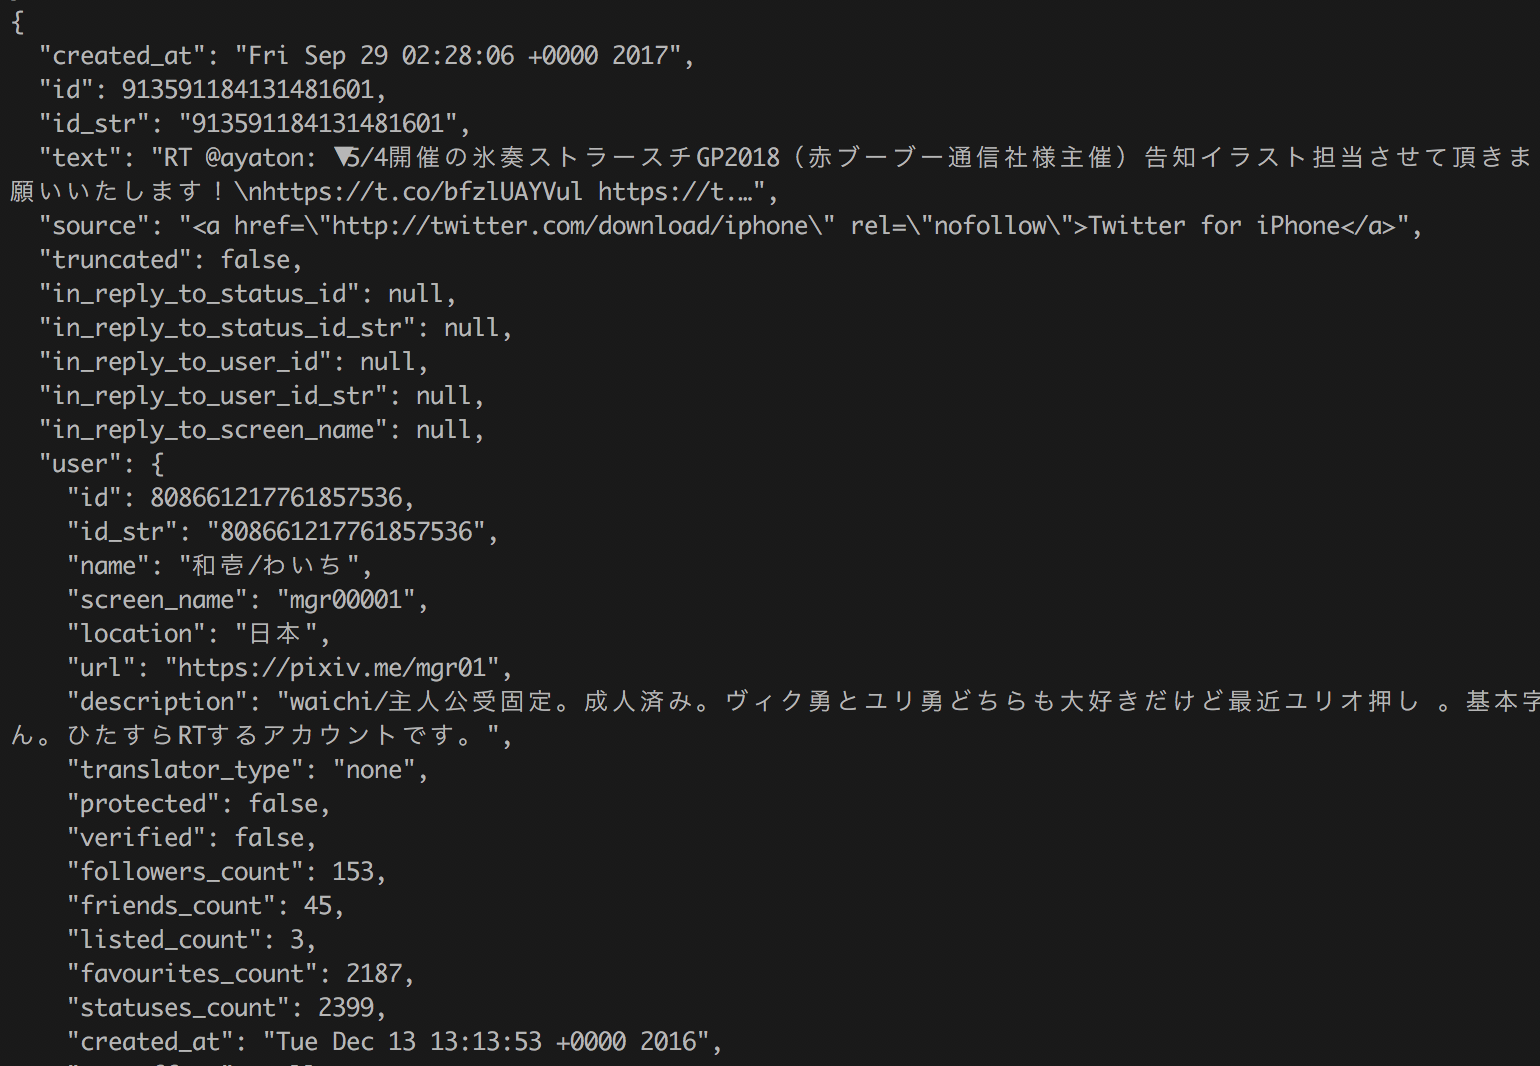
(本来Twitter for Webでは見れない「投稿に使ったクライアント名（Twitter for iPhone）」も取得できる）

## とりあえず触ってみる

## 中級: 認証が必要なAPIを叩いてみる
認証が必要なAPIの特徴
* 有名どころがやってる
* 何かを更新したり,頻繁に更新されるものを取得したりする
* 処理が比較的重い
* 頻繁に使われるものではない

認証が必要なAPIの例
* [Twitter Developer](https://dev.twitter.com)
* [Slack Application](https://qiita.com/sukesuke/items/1ac92251def87357fdf6)
* [Yahoo 形態素解析](http://dic.nicovideo.jp/a/%E3%83%8B%E3%82%B3%E3%83%8B%E3%82%B3%E5%8B%95%E7%94%BBapi)

取得系以外も取得系もたくさんある  
https://matome.naver.jp/odai/2144230147636045901



### 認証って？雑に言うとどんな感じ＞
* HTTPの機能を使った`Basic`認証・`Digest`認証
  - ユーザ名とパスワードを使った単純明快な認証方式
  - `人`を認証する
  - ユーザの認証に使われることが多いが、問題も多く最近は使われない
    + 昔はTwitterも採用してたけどセキュリティの問題?で使えなくなった 
* アプリケーションに発行される`トークン`を利用した認証
  - トークンを持ってる人・アプリケーションはアクセスできる方式
  - `アプリケーション`を認証することが多い。一人一人にトークンを発行すれば`人`の認証も可能
  - トークンが流出すると、流出したトークンでサービスに不正アクセスすることもできてしまう
* アプリケーションに関連付けされた鍵を使って個人が認証する`OAuth`認証
  - サービスとアプリケーションの間での鍵とサービスと利用者の間での鍵の二つを利用する
  - `アプリケーション`を認証してかつ`人`を認証する
  - サーバからAccess keyを取得し、それをトークンのように使ってアクセスする
  - 結構安全

下に行けば行くほど面倒くさいが自由度が高い

例) Twitter: OAuth認証  ... 人が個人のTwitterアカウントに不特定多数が使うアプリケーションでアクセスする  
例)   Slack: トークン認証 ... Botアプリケーションが自組織のSlackにアクセスする ・・・人を認証する必要がない



### 例題: 簡単なTwitterクライアントを作ってみる
#### なぜTwitterなのか
OAuth認証ですが、  
面倒な認証周りを代わりにやってくれるライブラリがあり、  
APIとしても出来ることがすごく多いため、  
練習にはもってこいだと私は考えています。

#### 必要なモジュール
`tweepy`: TwitterをPythonで扱うためのモジュール [Github](https://github.com/tweepy/tweepy), [公式ドキュメント](http://www.tweepy.org/)

#### 手順
1. アプリケーション用の鍵（`Consumer Key`, `Consumer Secret`)と、  
デバッグ用のアカウントと関連づけられた鍵(`Access Token`, `Access Token Secret`)を取得する
1. **認証情報を使って**指定されたエンドポイント（URL）にアクセスし、**データを取得**する
2. データをプログラムで扱うための形式に**変換**する
3. 受け取ったデータを好きなように**使う**

---

1. ツイッターに何かを発信する

## 注意
Hivehub(テスト中のJupyterHub Notebook Server)以外での実行では、`tweepy`パッケージを別途インストールする必要があります。  
`pip install tweepy`

### 1.  アプリケーション用の鍵（`Consumer Key`, `Consumer Secret`)と、  
###     デバッグ用のアカウントと関連づけられた鍵(`Access Token`, `Access Token Secret`)を取得する
<!-- もしかしたら今までとやり方が大きく変わっててこの資料が無駄になるかもしれない -->

### 注意
最近Twitter Developersの仕様が変わって面倒になっており、https://dev.twitter.com/ から飛べないようなので  

直接** [https://apps.twitter.com/](https://apps.twitter.com/) **を開いてください。
<!-- 八王子駅を出た -->

Twitterにログインしていなければ以下のような画面になるので、その場合は右上から`sign in`ボタンからログインをしてください。


今までアプリケーションを作成した事がなければ、このような画面になっているはずです。
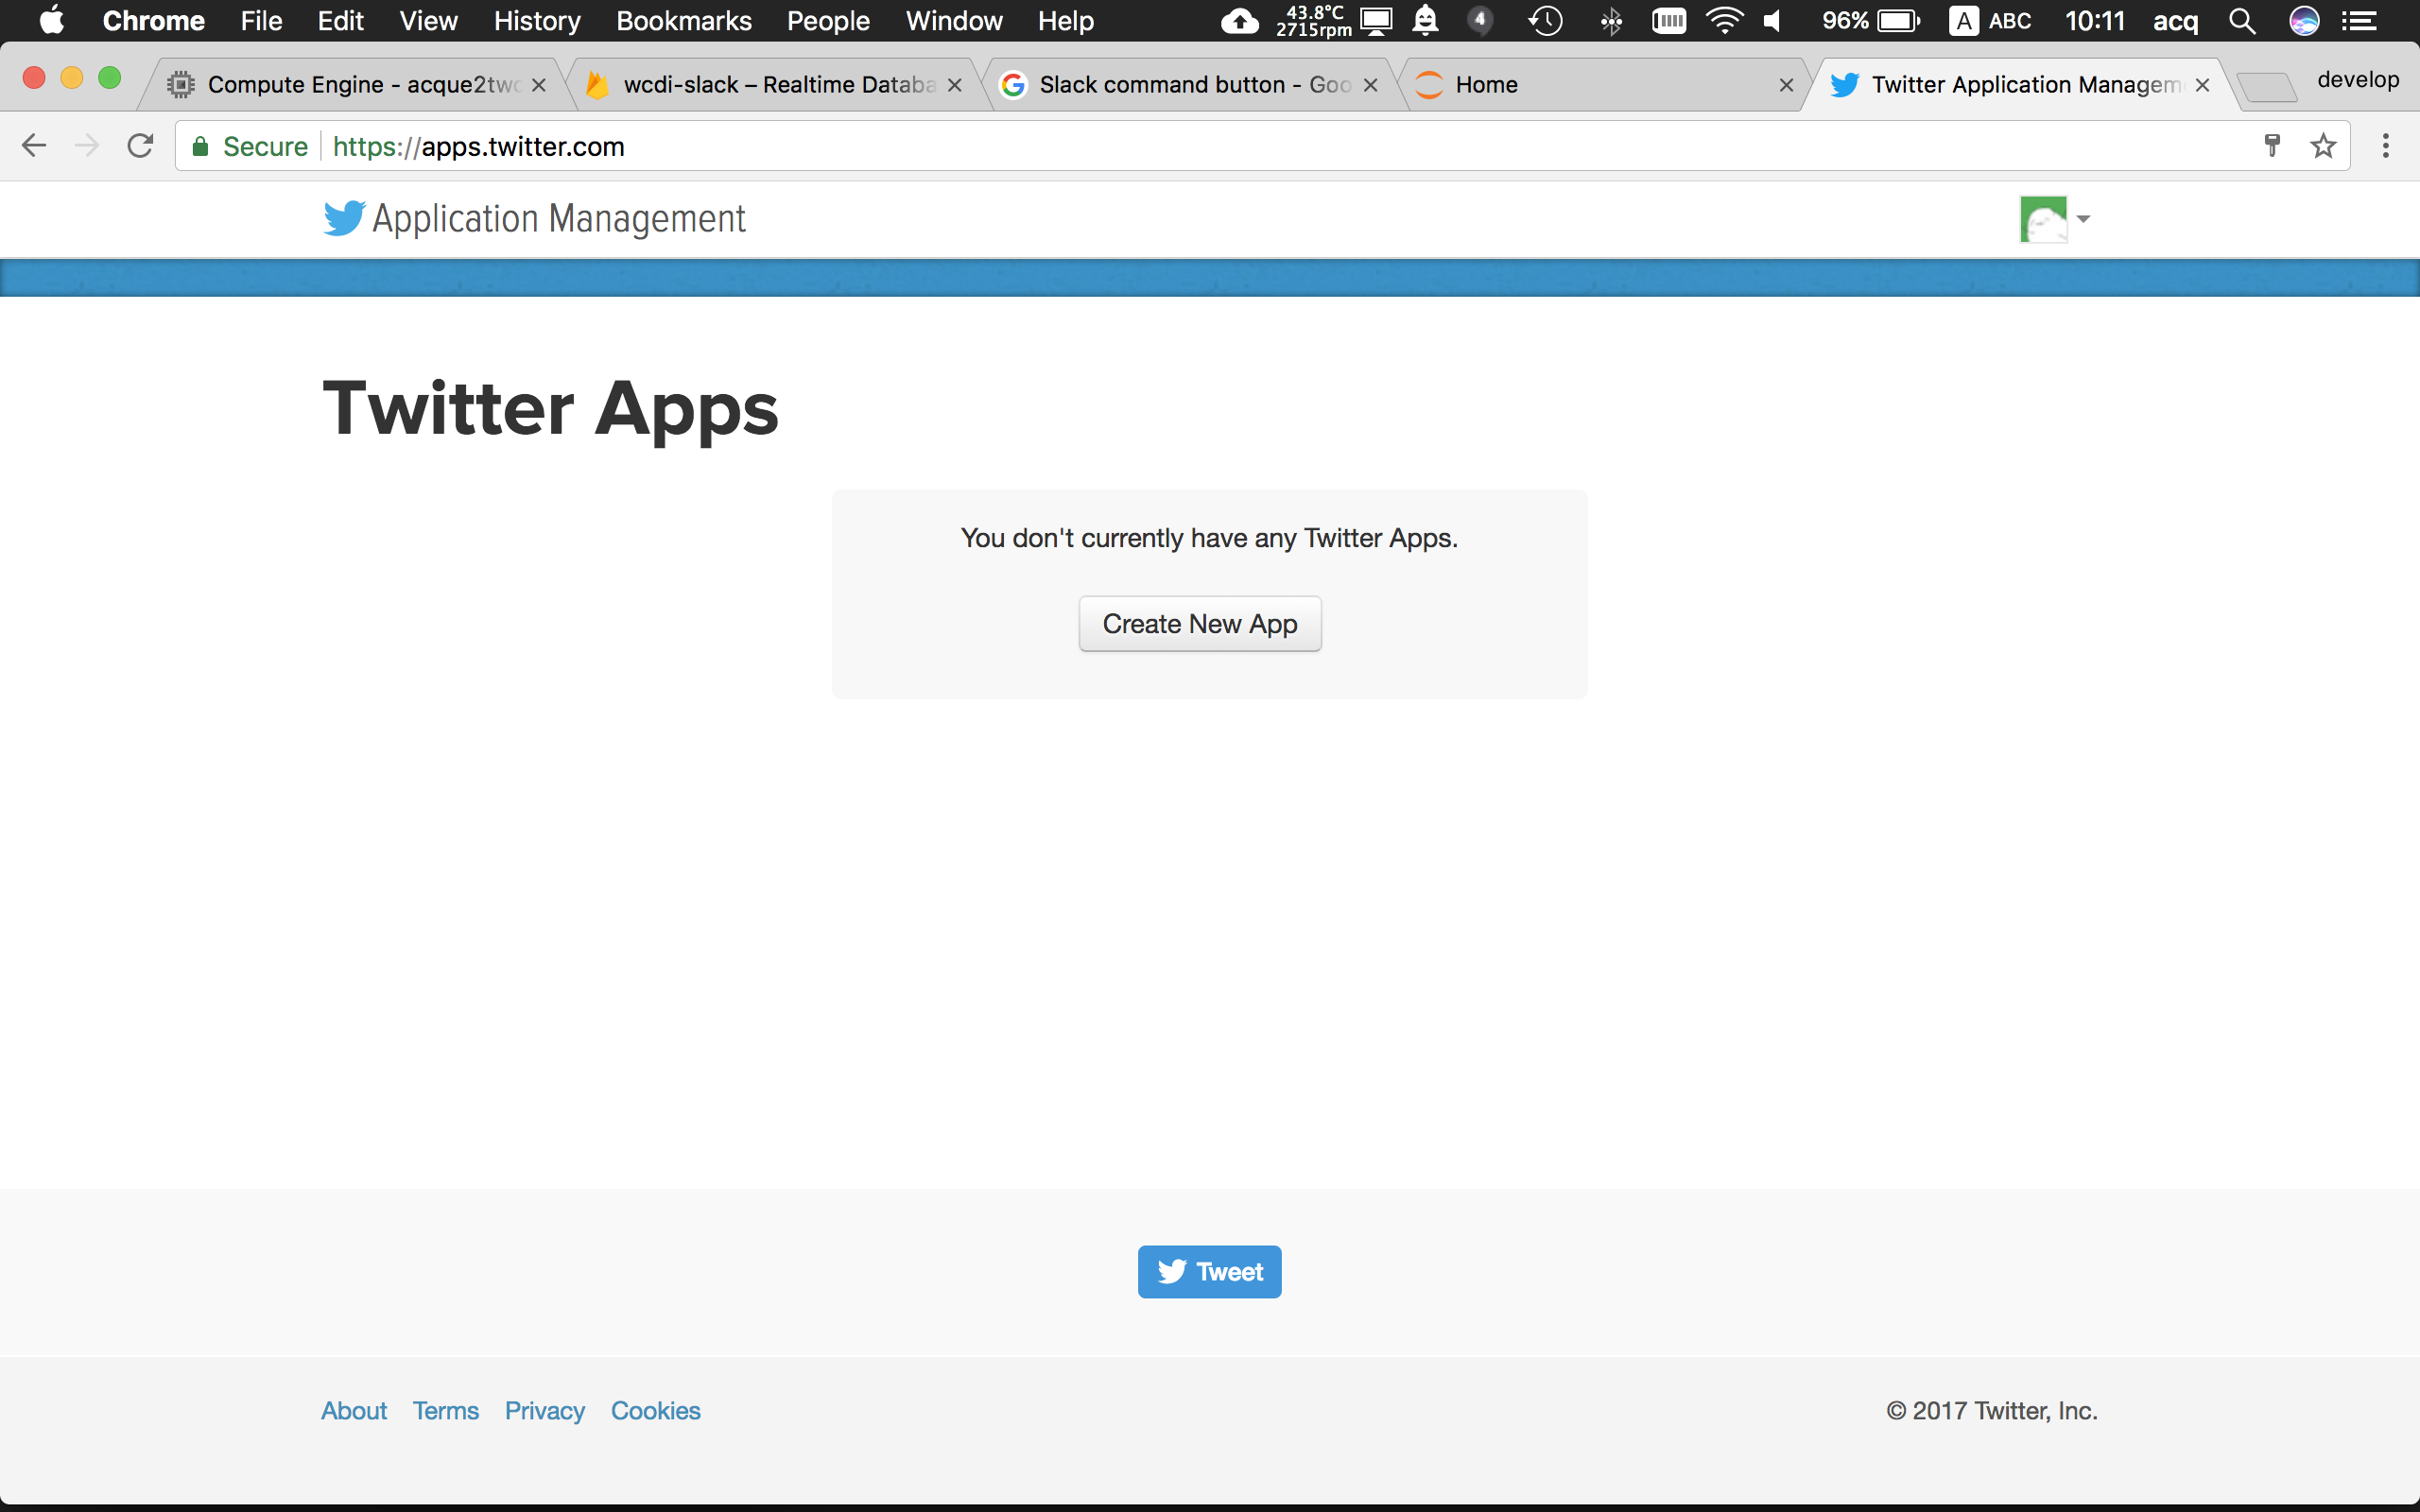

`Create new apps`からアプリケーションを作成します
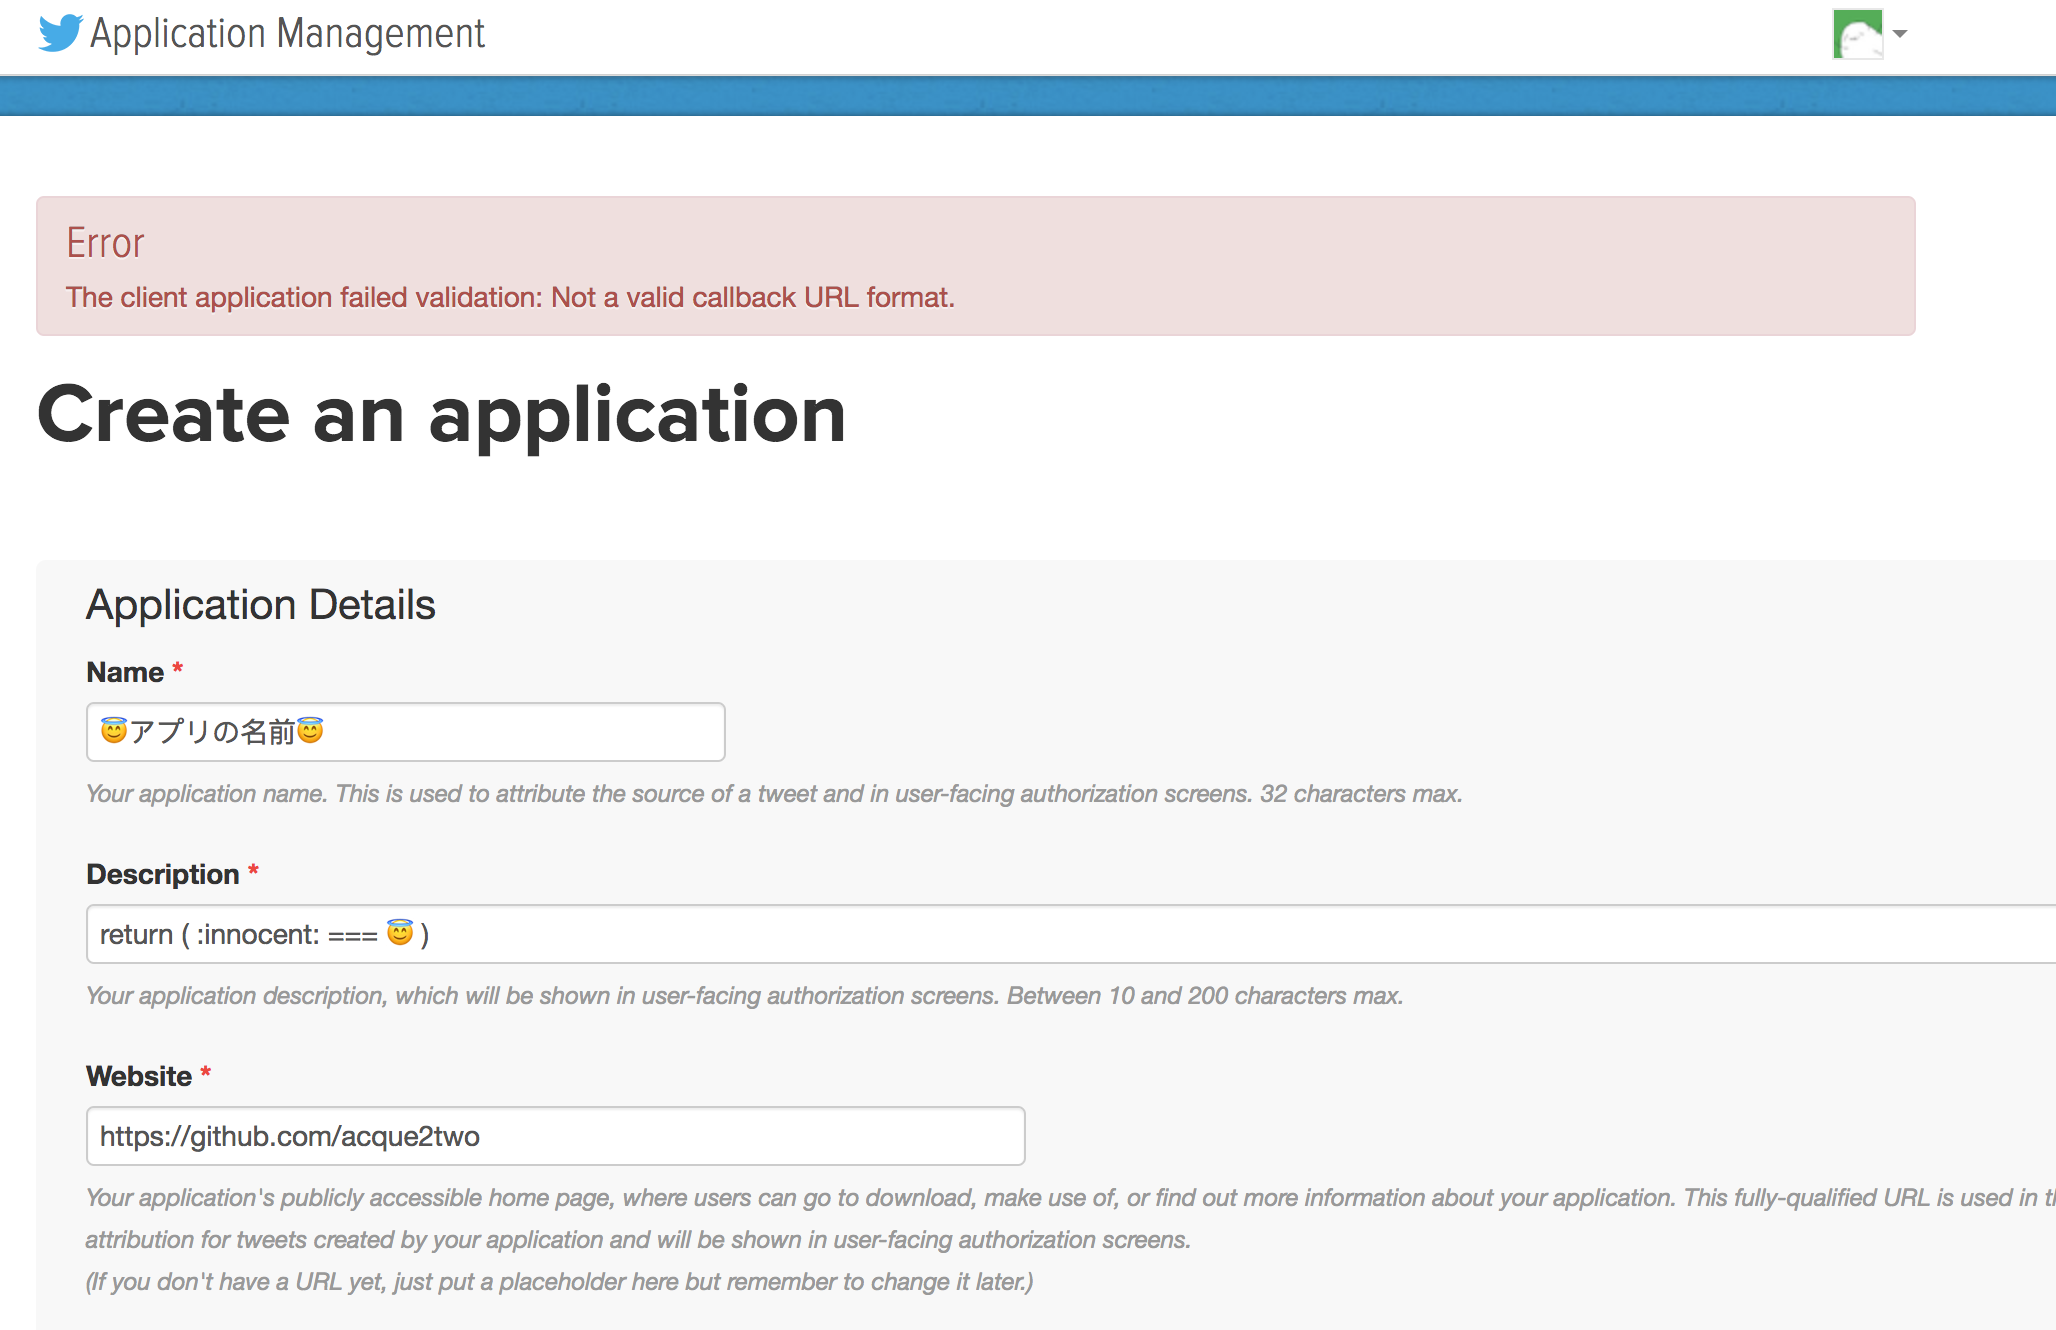
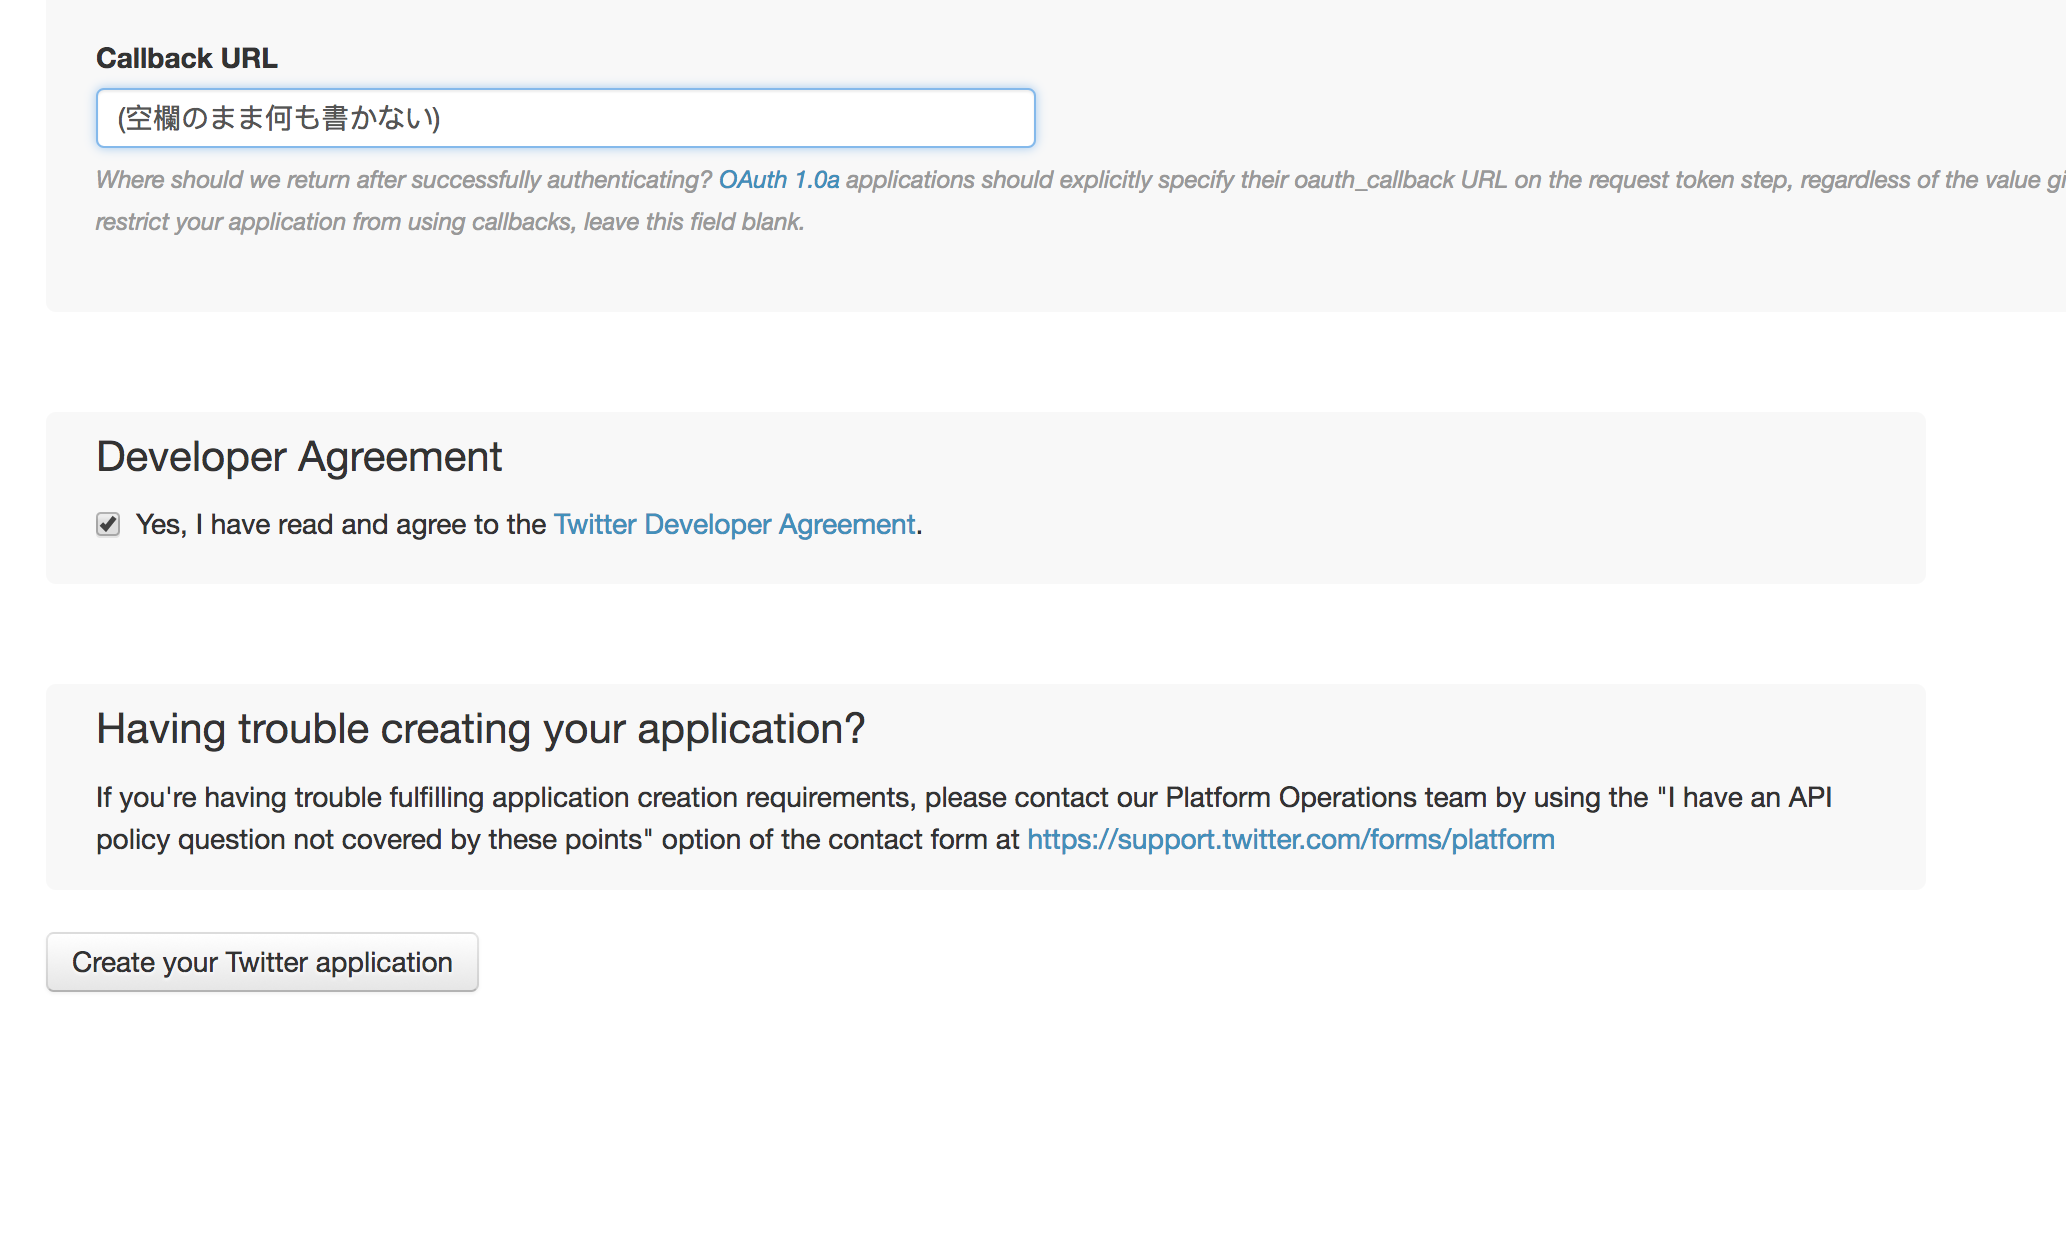

* アプリケーションの名前は~~本当は表示しちゃダメだけど~~クライアント名を表示しているクライアントから見える名前になるので恥ずかしくないものがいいです。また他の人が使っているアプリケーション名と重複してはいけません。
  - 使えない例) `Twitter for Android`
  - 使えない例) `Janetter`
  
* 説明文はそこそこ適当で構いませんが、最低文字数制限10文字を越すようにしてください。
* Websiteは自分のWebサイトがある人はそれを使うか、ない場合や公開したくない場合はGithubのURLを貼っておいてください。
* `Callback URL`は空欄で大丈夫です。
* `Developer Agreement` (開発者規約)は同意する必要があるので内容を確認してチェックを入れてください。

全て終わったら`Create your twitter application`を押す事でアプリケーションをTwitterと連携するためのキーが作成されます。

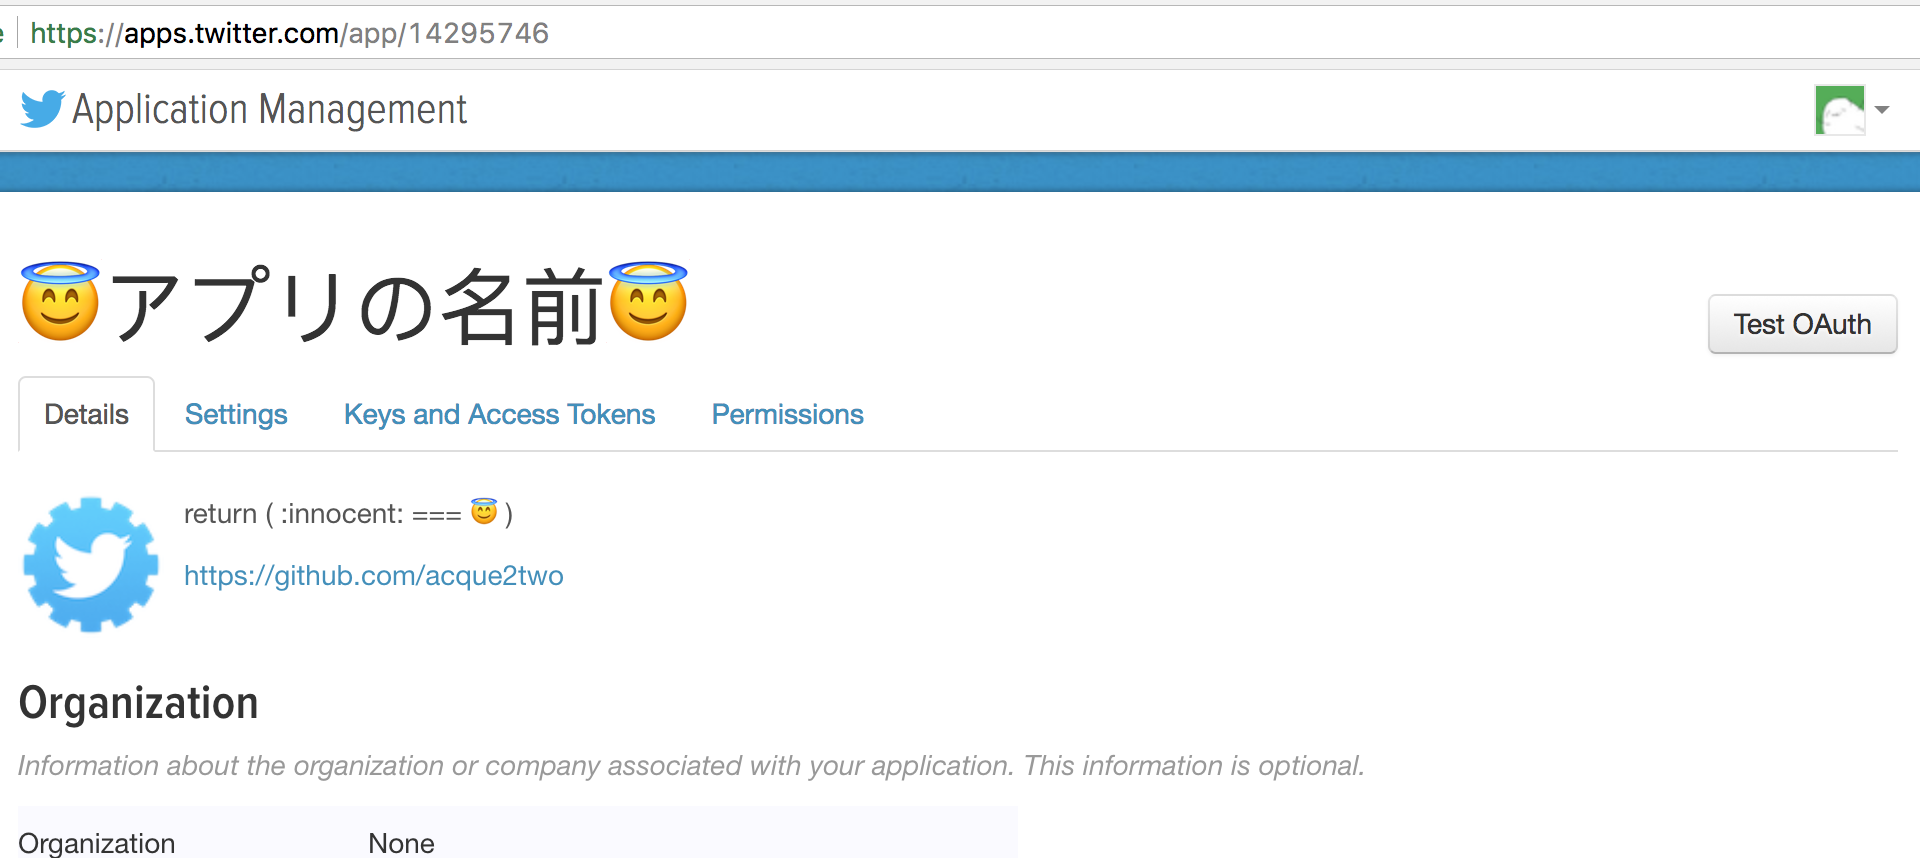

`Keys and Access Tokens`タブを開いてください。
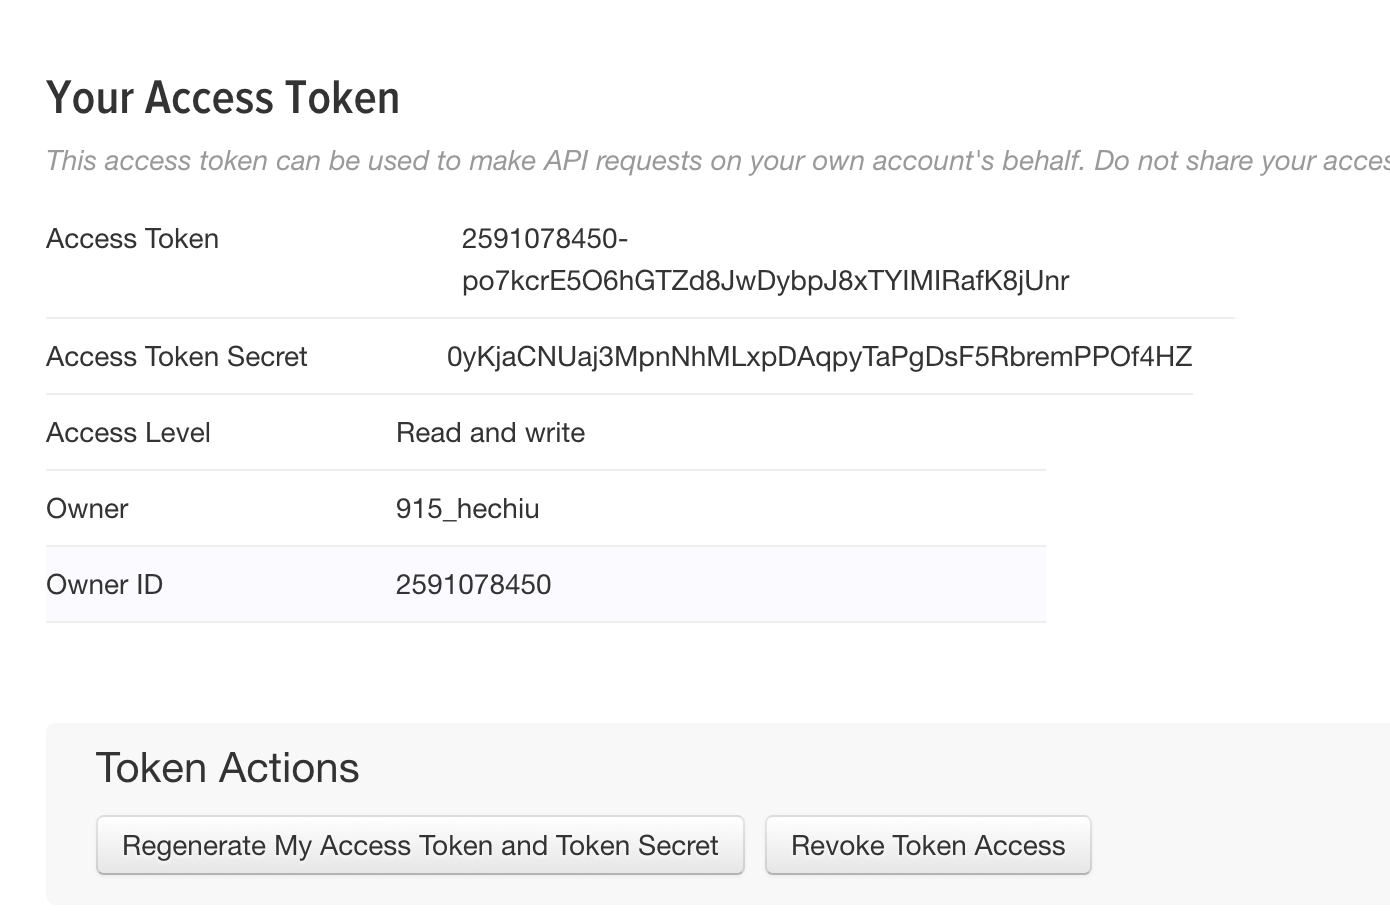



In [4]:
# 自分の鍵の情報をPythonに入力
CONSUMER_KEY = 'iv53MDraCgyzXu3GCH3hjdQex'
CONSUMER_SECRET = '0yQ1TxWCQ9USgzTkvjGs2cgorxhwvMwAmCoJRUzFVFNFsEFJ2f'
ACCESS_TOKEN = '977384728457179136-9rSUIsXNpbKD7xBvwgW3oS2fV1WkUAx'
ACCESS_TOKEN_SECRET = 'C8bkay9hmYcvDPhe0uy1Ny7oYrxnzSFQD7jGJ1nd3lGAB'


In [5]:
import tweepy

# 認証に必要なConsumer Keyをセットして認証に使うハンドラを生成する
twitter_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
# 今回はすでに認証済みのアクセストークンを使う
twitter_auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)


### 2. **認証情報を使って**指定されたエンドポイント（URL）にアクセスし、**データを取得**する

tweepyに簡単にアクセスできるメソッドとしてAPIを叩くものが存在しているのでそれを使う  
http://docs.tweepy.org/en/v3.5.0/api.html

In [6]:
# tweepyに認証情報を渡したAPIを叩くためのオブジェクトを生成する
api = tweepy.API(twitter_auth)

timeline = api.home_timeline()


In [14]:
# https://syncer.jp/Web/API/Twitter/REST_API/GET/statuses/home_timeline/
# レスポンスと同じ値がドットつなぎでアクセスできる
for i in timeline:
    print("%s: %s" % (i.user.screen_name, i.text))

lupin_anime: RT @telecom_anime: AnimeJapan2018、土曜日のステージがまもなくスタートです！
4月放送開始「ルパン三世 PART5」は日本テレビブース、トムス・エンタテインメントブースでそれぞれトークイベント有り！詳しくは公式サイトにてご確認ください。 #ルパン…
GachapinBlog: 明日はポンキッキーズの最終回なんだ。だから「いっしょに見ようね」ってムックと約束しました。
この写真は、1973年4月の放送第1回目の写真だよ。 https://t.co/KNsNjZnaS4
lupin_anime: RT @Lupin_Pt5: おはようございます！宣伝Tです。本日からAnimeJapan2018パブリックデイです！日本テレビブースの模様はLive配信されるので、会場にいらっしゃらない方でもご覧いただけますよ！10:25より栗田貫一さんと浄園Pが登場します‼︎
#ルパン5…
lupin_anime: ┏━━━━━━━━━━━━┓
　          　AM 0：00
┗━━━━━━━━━━━━┛
死にたくなかったら、頭を隠してな！
#ルパン三世時報 #次元大介 https://t.co/dqFolm3D0G
VW_JPN: ＼e-Mobility スペシャルサイト公開！／
フォルクスワーゲンは、いつの時代も、人とクルマのあり方を見つめ、世界に先駆けてきました。

今、環境への配慮と、静かで快適なドライブが楽しめるクルマとして、EVやPHEVの開発、そ… https://t.co/KRQE34bZCI
VW_JPN: ＼e-Mobility スペシャルサイト公開！／
「電気自動車の充電はどこでするの？」「ガソリン車と比べて何が良いの？」といった、様々な疑問にQ&amp;Aでわかりやすくご紹介。

フォルクスワーゲンのEV・PHEVラインアップもご覧いた… https://t.co/vEuz50aVe2
lupin_anime: 3/24・25「AnimeJapan2018」では『ルパン三世 PART5』のトークイベントを実施！イベント当日の情報は、PART5公式Twitter（@Lupin_Pt5）にてお知らせする予定です。ぜひアカウントをフォローしてく… https://t.co/brNMPuMhZX
j_metr

## 課題
自分で調べてTwitterに投稿してみましょう

In [22]:
a = api.update_status(" 伊達ゆうき ")
import time
time.sleep(5)
api.destroy_status(a.id)

Status(_api=<tweepy.api.API object at 0x10ecbfeb8>, _json={'created_at': 'Sat Mar 24 04:03:51 +0000 2018', 'id': 977395542903812098, 'id_str': '977395542903812098', 'text': '伊達ゆうき', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}, 'source': '<a href="https://hotarak.github.io" rel="nofollow">datey.99999990000000</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 977384728457179136, 'id_str': '977384728457179136', 'name': 'datey_python', 'screen_name': 'datey_python', 'location': '', 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 0, 'friends_count': 4, 'listed_count': 0, 'created_at': 'Sat Mar 24 03:20:52 +0000 2018', 'favourites_count': 0, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 6, 'lan